In [ ]:
from google.colab import drive
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
drive.mount ("Gdrive")


Drive already mounted at Gdrive; to attempt to forcibly remount, call drive.mount("Gdrive", force_remount=True).


In [ ]:

olist_path = "Gdrive/MyDrive/FORMATION DATA/Projet de fin de formation/Données"
olist_path + '/reviews_1250-end.csv'

'Gdrive/MyDrive/FORMATION DATA/Projet de fin de formation/Données/reviews_1250-end.csv'

In [ ]:
# Info fichier reviews_1250-end.csv
df_1250_end = pd.read_csv (f'{olist_path}/reviews_1250-end.csv')

df_1250_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49977 non-null  int64  
 1   author_id                 49977 non-null  object 
 2   rating                    49977 non-null  int64  
 3   is_recommended            46160 non-null  float64
 4   helpfulness               36522 non-null  float64
 5   total_feedback_count      49977 non-null  int64  
 6   total_neg_feedback_count  49977 non-null  int64  
 7   total_pos_feedback_count  49977 non-null  int64  
 8   submission_time           49977 non-null  object 
 9   review_text               49918 non-null  object 
 10  review_title              35599 non-null  object 
 11  skin_tone                 42776 non-null  object 
 12  eye_color                 43717 non-null  object 
 13  skin_type                 46346 non-null  object 
 14  hair_c

<ipython-input-29-3b1a6f12bf94>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_1250_end = pd.read_csv (f'{olist_path}/reviews_1250-end.csv')


In [ ]:
# Vérification des valeurs uniques

unique_values_rating = df_1250_end['rating'].unique()
unique_values_is_recommended = df_1250_end['is_recommended'].unique()

unique_values_skin_tone = df_1250_end['skin_tone'].unique()
unique_values_eye_color = df_1250_end['eye_color'].unique()
unique_values_skin_type = df_1250_end['skin_type'].unique()
unique_values_hair_color = df_1250_end['hair_color'].unique()

print(f"Les valeurs de la colonne rating sont:{unique_values_rating}")
print(f"Les valeurs de la colonne is_recommended sont:{unique_values_is_recommended}")
print(f"Les valeurs de la colonne skin_tone sont:{unique_values_skin_tone}")
print(f"Les valeurs de la colonne eye_color sont:{unique_values_eye_color}")
print(f"Les valeurs de la colonne skin_type sont:{unique_values_skin_type}")
print(f"Les valeurs de la colonne hair_color sont:{unique_values_hair_color}")


Les valeurs de la colonne rating sont:[5 3 2 4 1]
Les valeurs de la colonne is_recommended sont:[ 1.  0. nan]
Les valeurs de la colonne skin_tone sont:['lightMedium' 'mediumTan' 'fair' 'light' 'tan' 'Inconnu' 'deep'
 'fairLight' 'medium' 'rich' 'notSureST' 'dark' 'porcelain' 'olive'
 'ebony']
Les valeurs de la colonne eye_color sont:['green' 'brown' 'blue' 'hazel' 'Inconnu' 'Grey' 'gray']
Les valeurs de la colonne skin_type sont:['combination' 'oily' 'dry' 'normal' 'Inconnu']
Les valeurs de la colonne hair_color sont:['Inconnu' 'black' 'blonde' 'brown' 'gray' 'auburn' 'red' 'brunette']


In [ ]:
# 1. Résumé statistique des variables numériques

numerical_summary = df_1250_end.describe()

numerical_summary


,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,49977.000000,49977.000000,46160.000000,36522.000000,49977.000000,49977.000000,49977.000000,49977.000000
mean,24988.000000,4.212678,0.813323,0.767657,8.311163,1.936931,6.374232,66.884717
std,14427.261538,1.262289,0.389656,0.296319,21.285085,8.705750,16.778032,72.211730
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,12494.000000,4.000000,1.000000,0.664115,0.000000,0.000000,0.000000,28.000000
50%,24988.000000,5.000000,1.000000,0.884615,3.000000,0.000000,2.000000,45.000000
75%,37482.000000,5.000000,1.000000,1.000000,9.000000,2.000000,6.000000,74.000000
max,49976.000000,5.000000,1.000000,1.000000,1222.000000,1159.000000,776.000000,1900.000000


Le résumé statistique des variables numériques montre les points suivants :

**1- Rating :** Les notes varient de 1 à 5, avec une moyenne proche de 4.21, indiquant que les avis sont généralement positifs.

**2- Is Recommended :** En moyenne, 81.33% des produits sont recommandés, ce qui reflète une tendance positive des avis.

**3- Helpfulness :** La moyenne de l'indice d'utilité est de 0.767, indiquant que la plupart des retours sont jugés utiles par les utilisateurs.

**4- Feedback Counts :** Les moyennes des feedbacks positifs et négatifs montrent que les avis positifs prédominent. La répartition des feedbacks montre une large dispersion, comme le suggère l'écart type.

**5- Price USD :** Le prix des produits varie considérablement, de 3 à 1 900 USD, avec une moyenne d'environ 66.88 USD. L'écart type élevé indique une large gamme de prix parmi les produits.

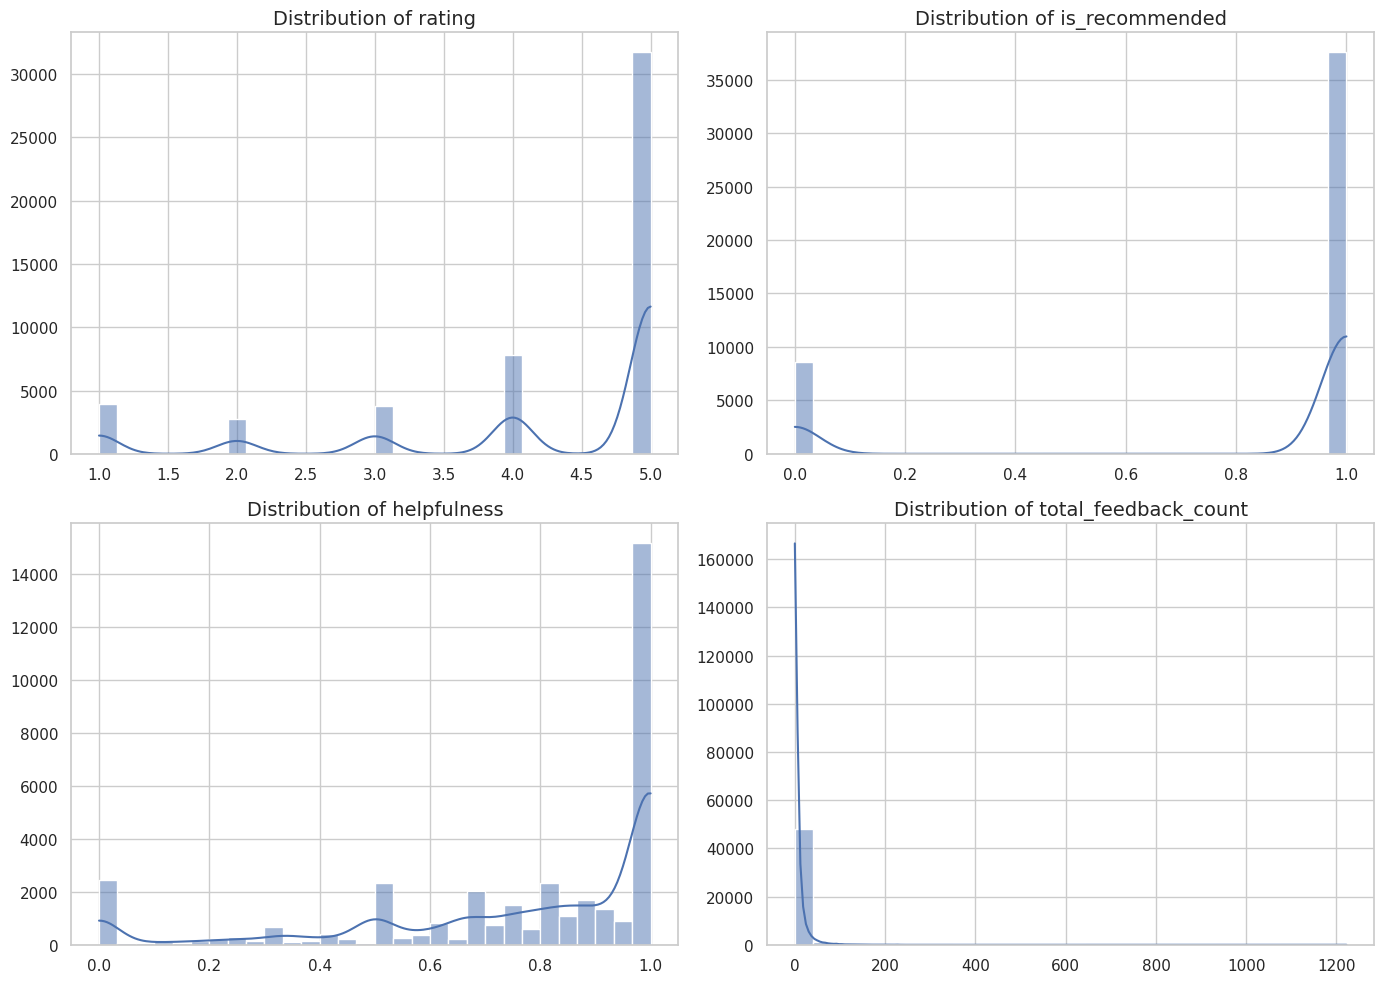

In [ ]:
# 2. Distribution des variables numériques: rating, helpfulness et price_usd

sns.set(style="whitegrid")

# Histogrammes pour les variables numériques
numerical_columns_for_hist = ['rating','is_recommended', 'helpfulness', 'total_feedback_count', 'total_neg_feedback_count','total_pos_feedback_count', 'price_usd']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
for col, ax in zip(numerical_columns_for_hist, axes.flatten()):
    sns.histplot(df_1250_end[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


**rating :** Forte concentration sur la note de 5, indiquant que de nombreux produits sont hautement évalués.

**helpfulness :** Concentration vers les valeurs élevées **==>** beaucoup d'avis sont considérés comme utiles.


**price_usd :** La distribution des prix montre une asymétrie positive, avec une concentration de produits dans les gammes de prix inférieures et quelques produits ayant des prix significativement plus élevés.

<ipython-input-7-eac44a6b82ae>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_1250_end[col], order = df_1250_end[col].value_counts().index, ax=ax, palette="Set2")
<ipython-input-7-eac44a6b82ae>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_1250_end[col], order = df_1250_end[col].value_counts().index, ax=ax, palette="Set2")
<ipython-input-7-eac44a6b82ae>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_1250_end[col], order = df_1250_end[col].value_counts().index, ax=ax, palette="Set2")
<ipython-input-7-eac44a6b82ae>:

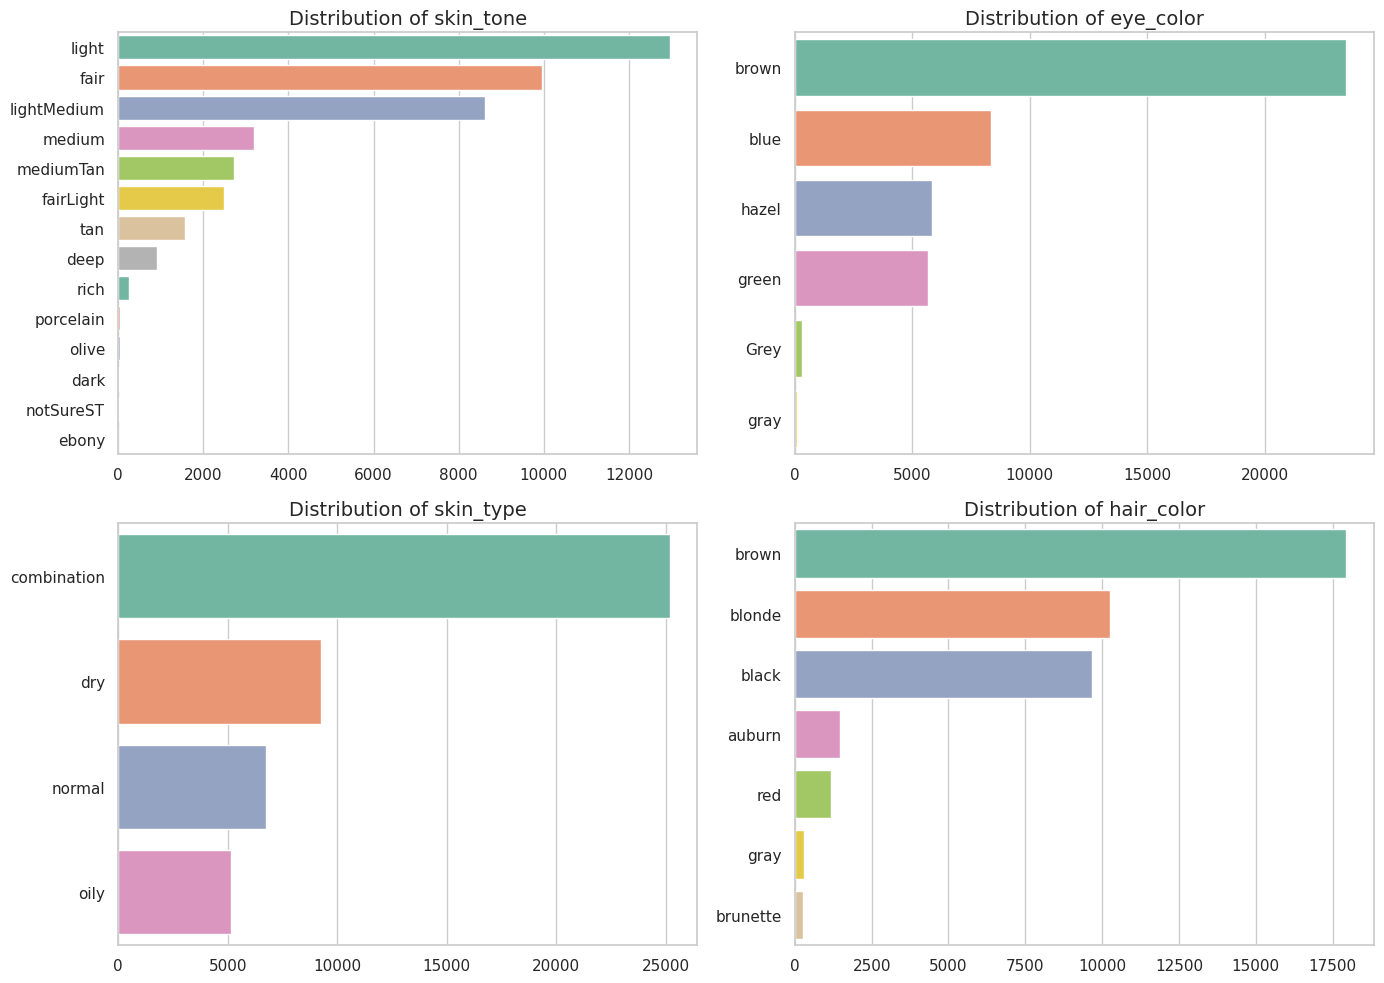

In [ ]:
# 3. Distribution des variables catégorielles: skin_type, eye_color ...
# Diagrammes à barres pour les variables catégorielles sélectionnées
categorical_columns = ['skin_tone', 'eye_color', 'skin_type', 'hair_color']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

for col, ax in zip(categorical_columns, axes.flatten()):
    sns.countplot(y=df_1250_end[col], order = df_1250_end[col].value_counts().index, ax=ax, palette="Set2")
    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()



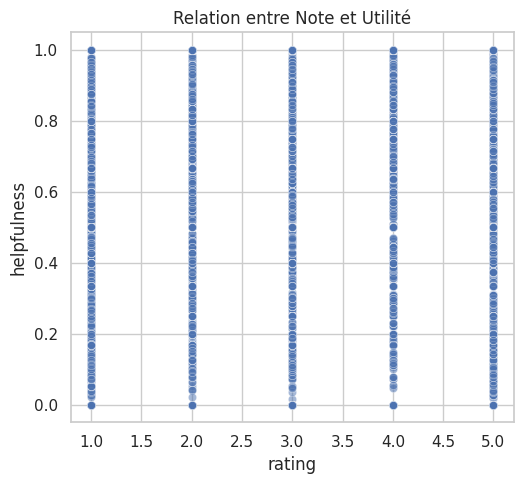

In [ ]:
# 4. Relations entre variables
# Relation entre rating et helpfulness via un diagramme de dispersion.

# Paramètres de style pour les graphiques
sns.set(style="whitegrid")

# Diagramme de dispersion entre rating et helpfulness
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_1250_end, x='rating', y='helpfulness', alpha=0.5)
plt.title('Relation entre Note et Utilité')
plt.tight_layout()
plt.show()

Les avis avec des ratings élevés (principalement 5 étoiles) ont tendance à être jugés plus utiles.


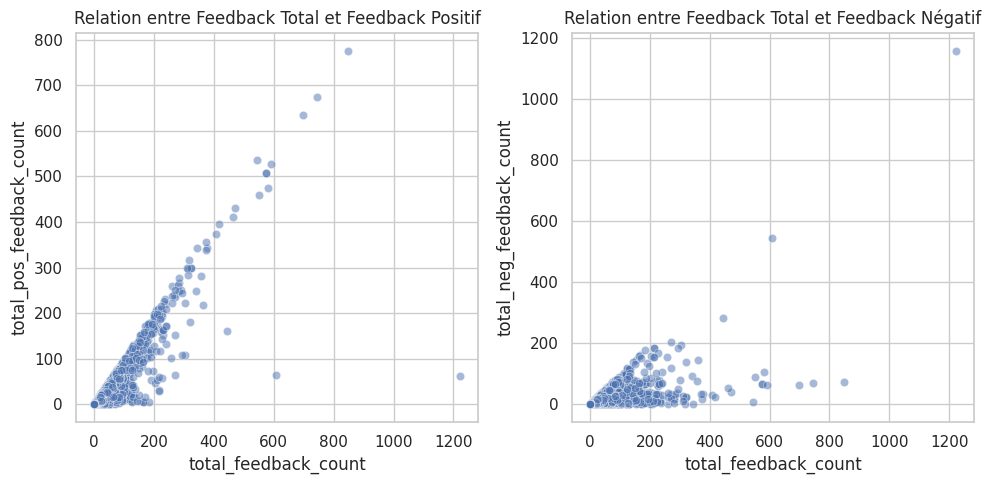

In [ ]:
# 4. Relations entre variables
# Paramètres de style pour les graphiques
sns.set(style="whitegrid")
# Diagramme de dispersion entre total_feedback_count et total_pos_feedback_count
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_1250_end, x='total_feedback_count', y='total_pos_feedback_count', alpha=0.5)
plt.title('Relation entre Feedback Total et Feedback Positif')

plt.tight_layout()

# Diagramme de dispersion entre total_feedback_count et total_pos_feedback_count
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_1250_end, x='total_feedback_count', y='total_neg_feedback_count', alpha=0.5)
plt.title('Relation entre Feedback Total et Feedback Négatif')

plt.tight_layout()
plt.show()

On observe une relation linéaire positive entre le nombre total de feedback reçu par un avis et le nombre de ces feedbacks qui sont positifs. Cela suggère que plus un avis reçoit de feedback en général, plus il est susceptible de recevoir un nombre élevé de feedbacks positifs.

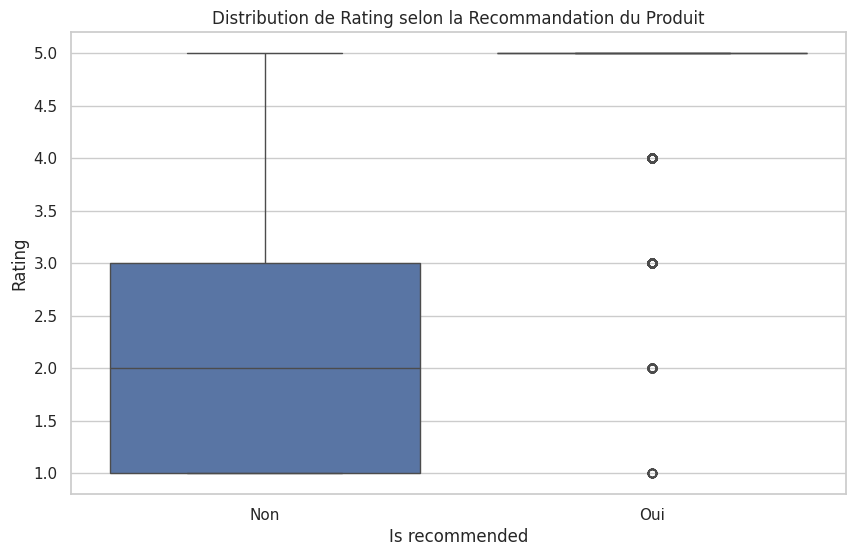

In [ ]:
# 4. Relations entre variables
# La distribution de rating selon le is_recommended (Boîtes à Moustaches)

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_recommended', y='rating', data=df_1250_end)
plt.title('Distribution de Rating selon la Recommandation du Produit')
plt.xlabel('Is recommended')
plt.ylabel('Rating')
plt.xticks([0, 1], ['Non', 'Oui']) # Convertir les labels de 0/1 à Non/Oui
plt.show()


Les produits recommandés ont des ratings significativement plus élevés, avec la médiane à 5 étoiles. Les produits recommandés sont généralement mieux notés.

<ipython-input-11-c3011c159f74>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1250_end, x='skin_type', y='rating', palette='pastel')
<ipython-input-11-c3011c159f74>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1250_end, x='is_recommended', y='rating', palette='pastel')


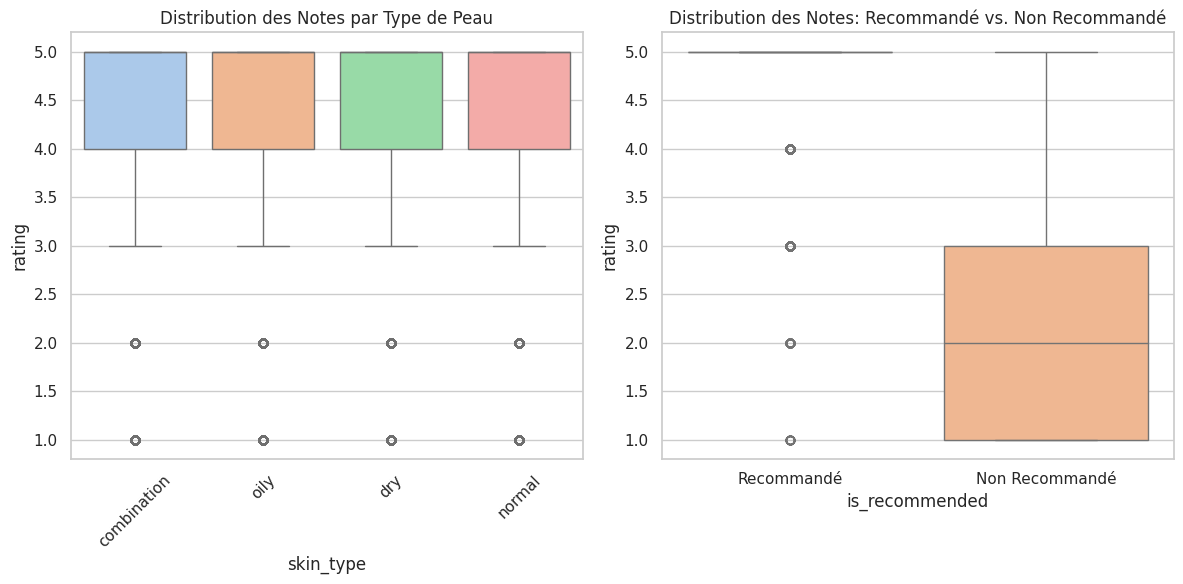

In [ ]:
# 4. Relations entre variables
# Créer des boîtes à moustaches pour comparer la distribution des notes entre différents types de peau et entre des produits recommandés et non recommandés.

plt.figure(figsize=(12, 6))

# Boîte à moustaches pour la distribution des notes par type de peau
plt.subplot(1, 2, 1)
sns.boxplot(data=df_1250_end, x='skin_type', y='rating', palette='pastel')
plt.title('Distribution des Notes par Type de Peau')
plt.xticks(rotation=45)

# Conversion de is_recommended en catégorie pour la légende
df_1250_end['is_recommended'] = df_1250_end['is_recommended'].map({1.0: 'Recommandé', 0.0: 'Non Recommandé'})

# Boîte à moustaches pour la distribution des notes entre produits recommandés et non recommandés
plt.subplot(1, 2, 2)
sns.boxplot(data=df_1250_end, x='is_recommended', y='rating', palette='pastel')
plt.title('Distribution des Notes: Recommandé vs. Non Recommandé')

plt.tight_layout()
plt.show()

**Distribution des Notes par Type de Peau :** Le type de peau n'affecte pas de manière significative la note donnée par les utilisateurs.
Cependant, certaines catégories, comme les types de peau "sensible" et "mixte", semblent avoir une gamme un peu plus large de notes

**Distribution des Notes: Recommandé vs. Non Recommandé **texte en gras**: Les produits recommandés ont tendance à avoir des notes plus élevées. Les produits non recommandés ont une distribution plus large, avec une tendance vers des notes plus basses.

<ipython-input-12-d1215db1c177>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'total_pos_feedback_count']].corr()


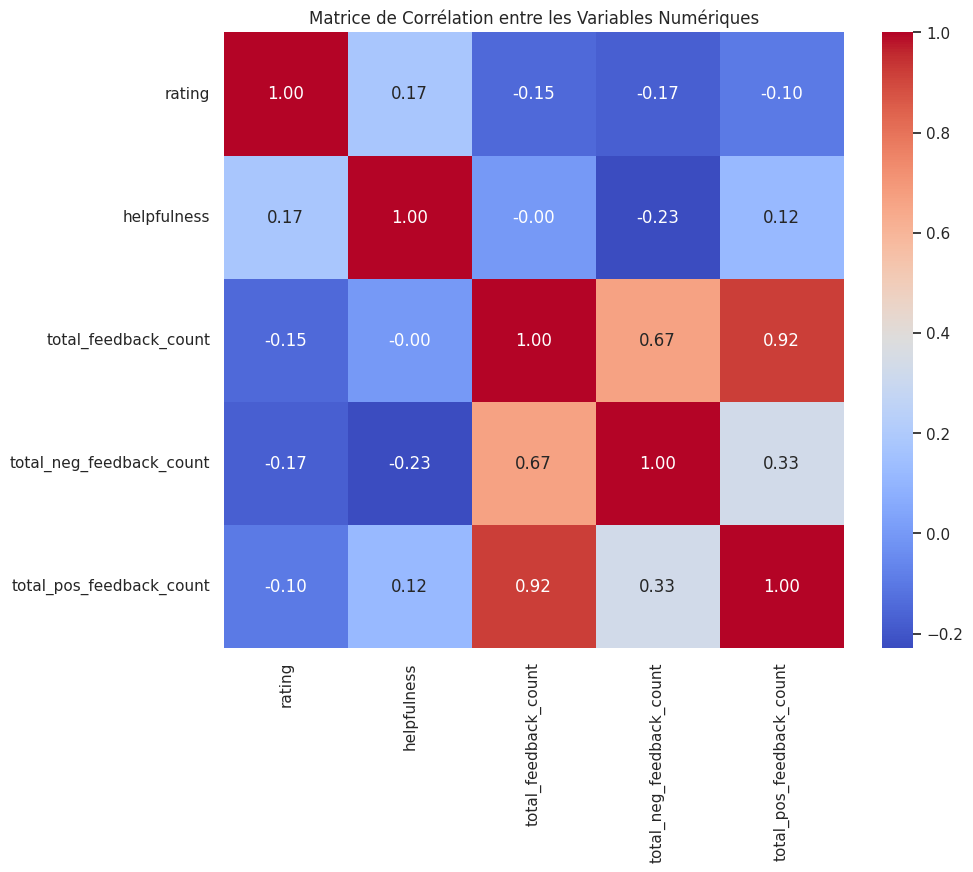

In [ ]:
# 5. Corrélation entre Variables Numériques:
# Calcul de la matrice de corrélation
correlation_matrix = df_1250_end[['rating', 'is_recommended', 'helpfulness',
                           'total_feedback_count', 'total_neg_feedback_count',
                           'total_pos_feedback_count']].corr()

# Visualisation de la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation entre les Variables Numériques')
plt.show()



**Corrélation entre rating et is_recommended :** Il y a une corrélation positive forte (0.69), **==>** Les produits avec des notes plus élevées sont probablement plus souvent recommandés.

**Corrélation entre total_feedback_count et total_pos_feedback_count :** La corrélation est très élevée (0.92)** ==>** Plus un avis reçoit de feedbacks en général, plus il reçoit de feedbacks positifs

Les autres corrélations sont relativement faibles

<ipython-input-13-866fd19298a6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data_df['Percentage'], y=missing_data_df.index, palette='viridis')


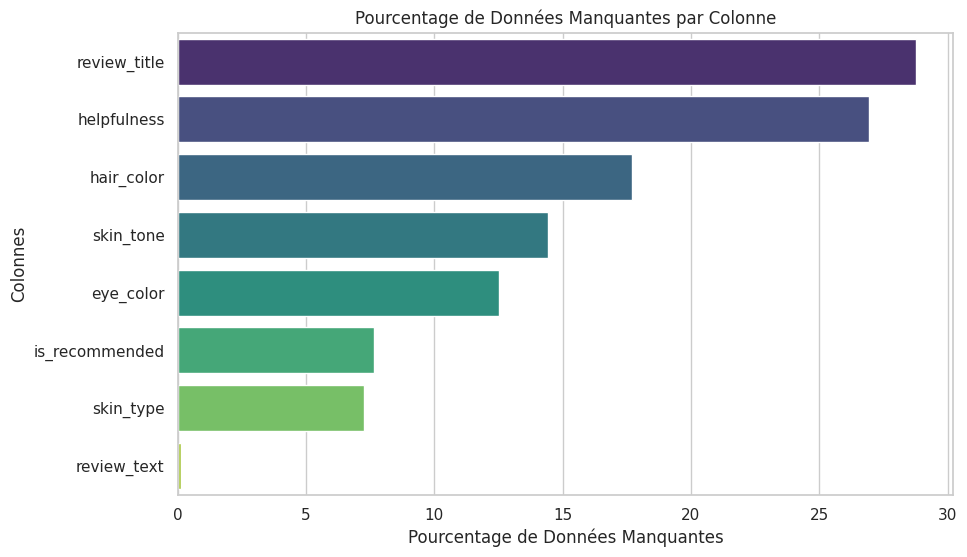

In [ ]:
# 5- Analyse des valeurs manquantes : Visualiser l'ampleur des données manquantes

# Calcul de la présence de valeurs manquantes pour chaque colonne
missing_data = df_1250_end.isnull().sum()
missing_data_percent = (df_1250_end.isnull().sum() / len(df_1250_end)) * 100

# Création d'un DataFrame pour la visualisation
missing_data_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_data_percent})

# Tri du DataFrame par pourcentage de données manquantes décroissant
missing_data_df = missing_data_df[missing_data_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

# Visualisation de l'ampleur des données manquantes
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data_df['Percentage'], y=missing_data_df.index, palette='viridis')
plt.title('Pourcentage de Données Manquantes par Colonne')
plt.xlabel('Pourcentage de Données Manquantes')
plt.ylabel('Colonnes')
plt.show()

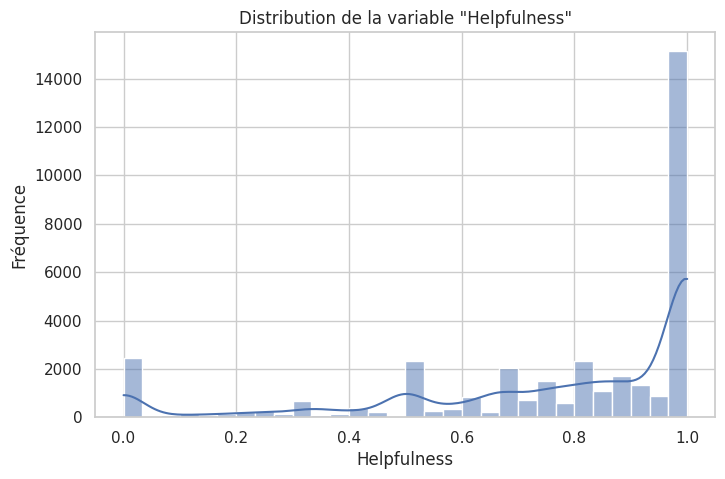

(0.7676571203243436, 0.8846150040626526)

In [ ]:
# 6 - Traitement des données numériques manquantes colonne helpfulness:

# Option 1- Remplacer par la moyenne ou la médiane : Cela dépend de la distribution de la variable (Si la distribution est symétrique, la moyenne peut être utilisée) (Si la distribution est biaisée, la médiane est souvent préférée)

# Option 2- Suppression des lignes : Avec 13455 valeurs manquantes, cette approche pourrait entraîner la perte d'une grande partie des données.
# distribution de la variable helpfulness
# Histogramme de la colonne 'helpfulness'
plt.figure(figsize=(8, 5))
sns.histplot(df_1250_end['helpfulness'].dropna(), kde=True, bins=30)  # Suppression des NaN pour la visualisation
plt.title('Distribution de la variable "Helpfulness"')
plt.xlabel('Helpfulness')
plt.ylabel('Fréquence')
plt.show()

# Calcul de la moyenne et de la médiane pour comparaison
mean_helpfulness = df_1250_end['helpfulness'].mean()
median_helpfulness = df_1250_end['helpfulness'].median()

mean_helpfulness, median_helpfulness


In [ ]:
# 7 - Traitement des données catégoriales manquantes:
# Identification des colonnes catégorielles
categorical_columns = df_1250_end.select_dtypes(include=['object', 'category']).columns

categorical_columns

Index(['author_id', 'submission_time', 'review_text', 'review_title',
       'skin_tone', 'eye_color', 'skin_type', 'hair_color', 'product_id',
       'product_name', 'brand_name', 'sentiment'],
      dtype='object')

In [ ]:
# 7 - Traitement des données catégoriales manquantes:
# Remplacement des valeurs manquantes par "Non renseignée" pour toutes les colonnes catégorielles
for column in categorical_columns:
    df_1250_end[column].fillna('Inconnu', inplace=True)

# Vérification si le remplacement a bien été effectué en recomptant les valeurs manquantes
missing_after_categorical_imputation = df_1250_end[categorical_columns].isnull().sum()
missing_after_categorical_imputation


author_id          0
submission_time    0
review_text        0
review_title       0
skin_tone          0
eye_color          0
skin_type          0
hair_color         0
product_id         0
product_name       0
brand_name         0
dtype: int64

In [ ]:
df_1250_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49977 non-null  int64  
 1   author_id                 49977 non-null  object 
 2   rating                    49977 non-null  int64  
 3   is_recommended            46160 non-null  float64
 4   helpfulness               36522 non-null  float64
 5   total_feedback_count      49977 non-null  int64  
 6   total_neg_feedback_count  49977 non-null  int64  
 7   total_pos_feedback_count  49977 non-null  int64  
 8   submission_time           49977 non-null  object 
 9   review_text               49977 non-null  object 
 10  review_title              49977 non-null  object 
 11  skin_tone                 49977 non-null  object 
 12  eye_color                 49977 non-null  object 
 13  skin_type                 49977 non-null  object 
 14  hair_c

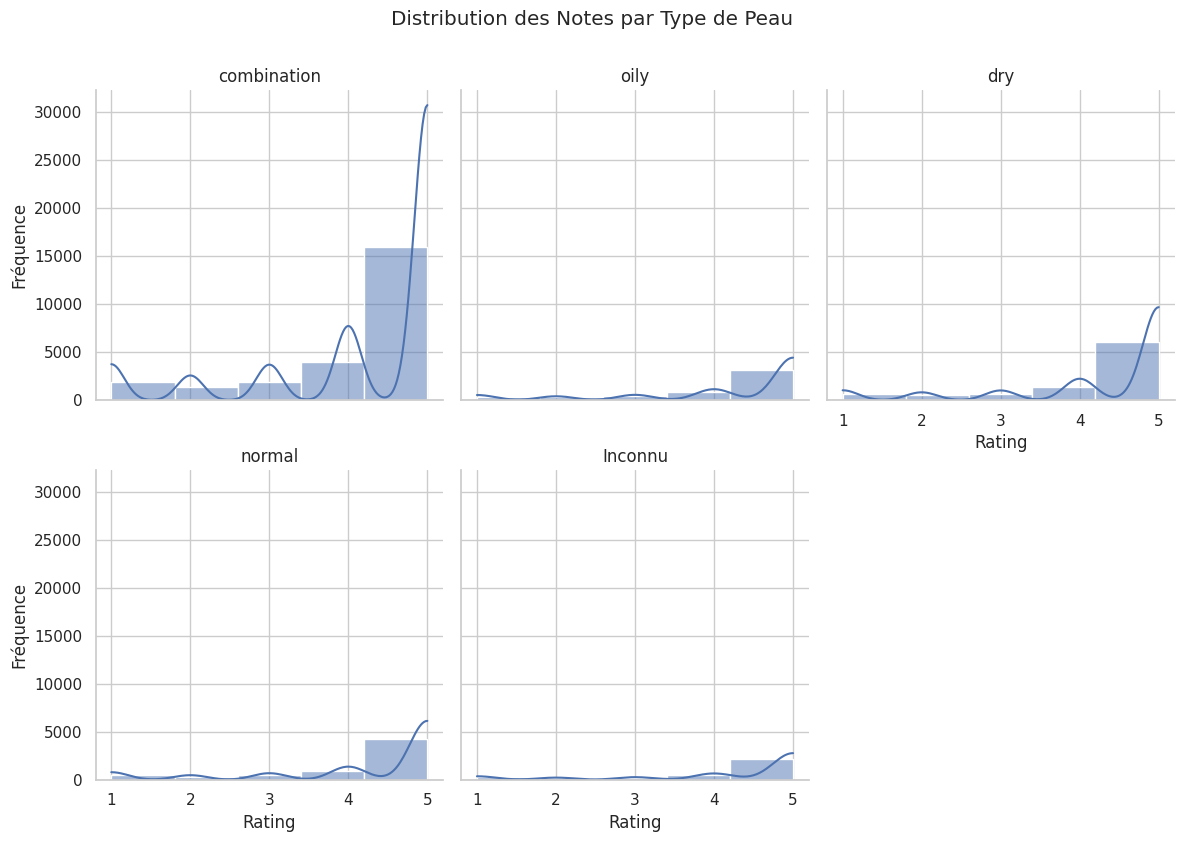

In [ ]:
# Utilisation de FacetGrid pour créer des histogrammes séparés pour chaque type de peau
g = sns.FacetGrid(df_1250_end, col='skin_type', col_wrap=3, height=4)
g.map(sns.histplot, 'rating', bins=5, kde=True)

g.fig.suptitle('Distribution des Notes par Type de Peau', y=1.05)
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Rating', 'Fréquence')
plt.show()


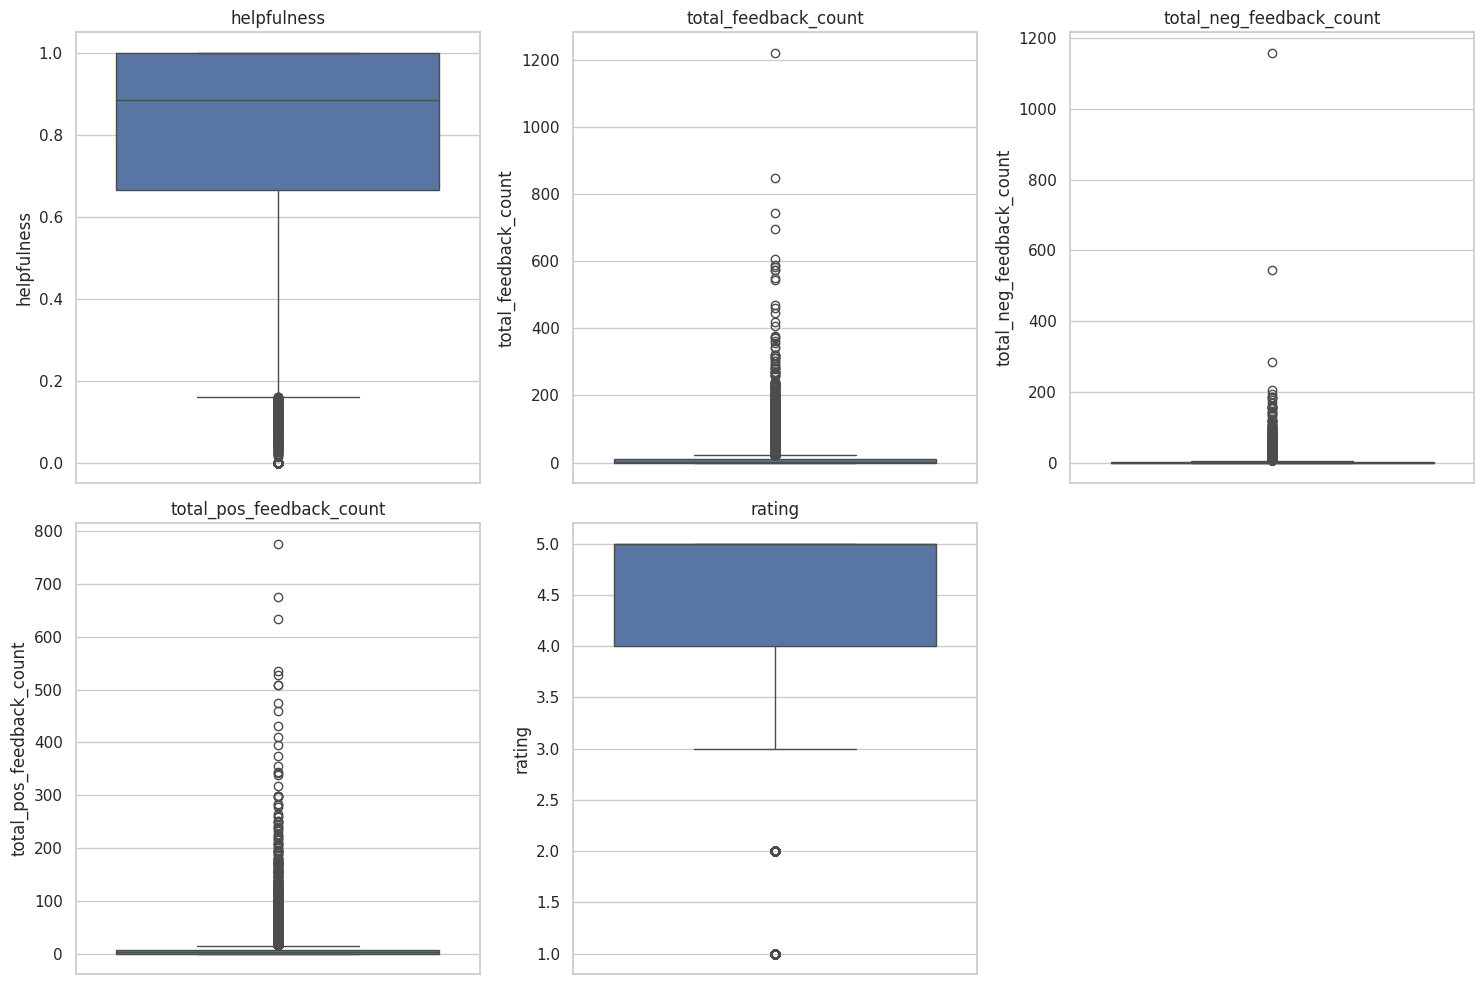

In [ ]:
# 8 - Identification des valeurs aberrantes pour les données numériques
# Sélection des colonnes numériques à examiner pour les valeurs aberrantes
columns_to_check = ['helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count','rating']

# Création des diagrammes à boîtes pour ces colonnes
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_1250_end[column])
    plt.title(column)

plt.tight_layout()
plt.show()






In [ ]:
# Création de la colonne helpfulness_calculated:
# The ratio of all ratings to positive ratings for the review: helpfulness = total_pos_feedback_count / total_feedback_count (Source: Kaggle)
# Étape 1: Création de la colonne 'helpfulness_calculated'
df_1250_end['helpfulness_calculated'] = df_1250_end.apply(lambda row: row['helpfulness'] if not pd.isnull(row['helpfulness'])
                                            else (row['total_pos_feedback_count'] / row['total_feedback_count'] if row['total_feedback_count'] > 0 else 0), axis=1)

# Étape 2: Comparaison entre 'helpfulness' et 'helpfulness_calculated' pour les valeurs non manquantes initialement
# Création d'une nouvelle colonne 'helpfulness_difference' qui ne prendra en compte que les valeurs non manquantes initialement de 'helpfulness'
# Définition de la tolérance
tolerance = 1e-4  # à titre d'exemple
df_1250_end['helpfulness_difference'] = (df_1250_end.apply(lambda row: None if pd.isnull(row['helpfulness'])
                                             else abs(row['helpfulness'] - row['helpfulness_calculated']), axis=1))

# Calcul des différences non nulles (sans prendre en compte les valeurs manquantes initialement)
# Ignorer les différences qui sont trop petites et qui pourraient être dues à des erreurs d'arrondi
diff_count = df_1250_end['helpfulness_difference'].dropna().apply(lambda x: x > tolerance).sum()

# Nombre de différences significatives
diff_count, df_1250_end[['helpfulness', 'helpfulness_calculated', 'helpfulness_difference']].dropna().head()



(0,
    helpfulness  helpfulness_calculated  helpfulness_difference
 0     0.000000                0.000000                     0.0
 1     0.333333                0.333333                     0.0
 2     1.000000                1.000000                     0.0
 3     1.000000                1.000000                     0.0
 4     1.000000                1.000000                     0.0)

In [ ]:
df_1250_end.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49977 entries, 0 to 49976
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                49977 non-null  int64  
 1   author_id                 49977 non-null  object 
 2   rating                    49977 non-null  int64  
 3   is_recommended            46160 non-null  float64
 4   helpfulness               36522 non-null  float64
 5   total_feedback_count      49977 non-null  int64  
 6   total_neg_feedback_count  49977 non-null  int64  
 7   total_pos_feedback_count  49977 non-null  int64  
 8   submission_time           49977 non-null  object 
 9   review_text               49977 non-null  object 
 10  review_title              49977 non-null  object 
 11  skin_tone                 49977 non-null  object 
 12  eye_color                 49977 non-null  object 
 13  skin_type                 49977 non-null  object 
 14  hair_c

In [ ]:
# Corrélation entre le rating et la recommandation : Vérifier s'il existe une corrélation entre la note attribuée (rating) et la recommandation du produit (is_recommended).
# Vérification des valeurs manquantes pour les colonnes concernées
missing_values = df_1250_end[['rating', 'is_recommended']].isnull().sum()

# Calcul de la corrélation de Pearson
correlation = df_1250_end[['rating', 'is_recommended']].corr()

missing_values, correlation


(rating               0
 is_recommended    3817
 dtype: int64,
                   rating  is_recommended
 rating          1.000000        0.871608
 is_recommended  0.871608        1.000000)

Il y a 3,817 valeurs manquantes dans la colonne is_recommended, mais aucune valeur manquante dans la colonne rating.

Malgré ces valeurs manquantes, la corrélation entre rating et is_recommended est de 0.87, indiquant une forte corrélation positive** ==>** Plus la note (rating) attribuée à un produit est élevée, plus la probabilité que le produit soit recommandé (is_recommended) est grande

In [ ]:
# Des analyses groupées
# Analyse par marque de produit (brand_name) : Comparer la satisfaction des clients, mesurée par la note moyenne et le ratio de recommandation, entre différentes marques.
# Groupe par marque de produit et calcul des statistiques pour chaque groupe
grouped_by_brand = df_1250_end.groupby('brand_name').agg(
    average_rating=pd.NamedAgg(column='rating', aggfunc='mean'),
    average_recommendation_ratio=pd.NamedAgg(column='is_recommended', aggfunc='mean')
).reset_index()

# Tri des résultats par note moyenne décroissante pour mieux visualiser les marques les mieux notées
grouped_by_brand_sorted = grouped_by_brand.sort_values(by='average_rating', ascending=False)

grouped_by_brand_sorted.head()


,brand_name,average_rating,average_recommendation_ratio
28,Erno Laszlo,5.000000,1.000000
39,Gisou,4.901235,0.975309
106,The Nue Co.,4.859155,0.957746
66,MARA,4.854908,0.978663
112,alpyn beauty,4.852349,0.973154


Les cinq marques ayant la note moyenne la plus élevée et leur ratio moyen de recommandation :

Erno Laszlo : Note moyenne de 5.00 et 100% de recommandations.
Gisou : Note moyenne de 4.90 et 97.53% de recommandations.
The Nue Co. : Note moyenne de 4.86 et 95.77% de recommandations.
MARA : Note moyenne de 4.85 et 97.87% de recommandations.
alpyn beauty : Note moyenne de 4.85 et 97.32% de recommandations.

Ces résultats montrent les marques qui ont reçu les évaluations les plus positives et qui sont le plus fréquemment recommandées par les clients.